In [1]:
## Udemy single layer NN XOR Problem using Keras

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

/Users/chaitanyabalasankula/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])


In [4]:
print(X.shape,Y.shape)

(4, 2) (4, 1)


In [38]:
model = Sequential()

model.add(Dense(4,input_dim = 2, activation = 'sigmoid'))
model.add(Dense(1,input_dim = 4, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,Y, epochs = 100, verbose = 2)

print(model.predict(X))

Epoch 1/100
 - 0s - loss: 0.2873 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.2871 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.2868 - acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.2865 - acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.2862 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.2859 - acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.2856 - acc: 0.5000
Epoch 8/100
 - 0s - loss: 0.2854 - acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.2851 - acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.2848 - acc: 0.5000
Epoch 11/100
 - 0s - loss: 0.2845 - acc: 0.5000
Epoch 12/100
 - 0s - loss: 0.2842 - acc: 0.5000
Epoch 13/100
 - 0s - loss: 0.2840 - acc: 0.5000
Epoch 14/100
 - 0s - loss: 0.2837 - acc: 0.5000
Epoch 15/100
 - 0s - loss: 0.2834 - acc: 0.5000
Epoch 16/100
 - 0s - loss: 0.2831 - acc: 0.5000
Epoch 17/100
 - 0s - loss: 0.2829 - acc: 0.5000
Epoch 18/100
 - 0s - loss: 0.2826 - acc: 0.5000
Epoch 19/100
 - 0s - loss: 0.2823 - acc: 0.5000
Epoch 20/100
 - 0s - loss: 0.2820 - acc: 0.5000
Epoch 21/100
 - 0s - loss: 0.2818 - acc: 0.5000
E

In [ ]:
## Udemy single layer NN Iris data set Problem using Keras

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.optimizers import adam

In [5]:
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target.reshape(-1,1)

In [ ]:
encoder = OneHotEncoder()
target = encoder.fit_transform(labels).toarray()

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.25)

model = Sequential()
model.add(Dense(10,input_dim = 4, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))

optimizer  = adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.fit(features,target, epochs = 1000, batch_size = 20, verbose = 2)

model.evaluate(feature_test,target_test)

In [81]:
## Andrew NG Neural Network weekly Assisgnment

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[0]
 [1]
 [2]
 ...
 [8]
 [9]
 [8]]


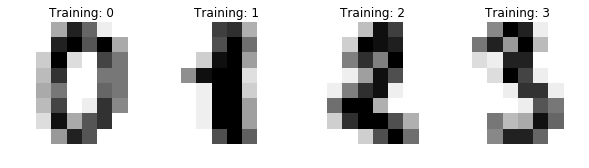

In [23]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
Y = digits.target

input_layer_size  = 64; 
hidden_layer_size = 25;   
num_labels = 10;

print(X[0])
print(digits.target.reshape(-1,1))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [24]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [25]:
def randinWeights(r,c):
    
    e = 0.12
    
    return np.random.rand(r, 1+c)*(2*e) - e

In [26]:
initial_Theta1 = randinWeights(hidden_layer_size, input_layer_size);
initial_Theta2 = randinWeights(num_labels, hidden_layer_size);

initial_nn_params = [initial_Theta1, initial_Theta2]


In [27]:
def NNCostGradFunc(nn_par, i_layer_size, h_layer_size, num_labels, X,Y,lamda):
    
    Theta1 = nn_par[0]
    Theta2 = nn_par[1]
    
    m = X.shape[0]
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    X = np.insert(X,0, np.ones((m)), axis = 1)
    
    a1 = X
    z2 = a1@Theta1.T
    a2 = sigmoid(z2)
    a2 = np.insert(a2,0, np.ones((m)), axis = 1)
    a3 = sigmoid(a2@Theta2.T)
    
    ry = np.identity(num_labels)[Y,:]

    cost = ry.T@np.log(a3) + (1 - ry).T@np.log(1 - a3)
    J = -sum(sum(cost)) / m

    reg = sum(sum(Theta1[:,2:]**2)) + sum(sum(Theta2[: , 2:]**2))

    J = J + (lamda/(2*m))*reg
    
    
    ## Back Propagation

    delta3 = a3 - ry
    delta2 = np.multiply((delta3@Theta2)[:,1:],d_sigmoid(z2))
    

    Delta1 = delta2.T@a1
    Delta2 = delta3.T@a2

    Theta1_grad = Delta1/m + lamda*np.insert(Theta1[:,1:],0, np.array((h_layer_size)), axis = 1)/m
    Theta2_grad = Delta2/m + lamda*np.insert(Theta2[:,1:],0, np.array((num_labels)), axis = 1)/m
    
    Theta_grad = [Theta1_grad, Theta2_grad]

    return J, Theta_grad


In [28]:
J,Theta_grad = NNCostGradFunc(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X,Y,1)

J

69.46225786296884

In [29]:
alpha = 0.1
lamda = 1

def Train_NN(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X,Y,lamda,alpha):
    
    iterations = 1000
    Theta1,Theta2 = initial_nn_params

    for i in range(iterations):

        J,Theta_grad = NNCostGradFunc(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X,Y,lamda)

        Theta1 = Theta1 - alpha*Theta_grad[0]
        Theta2 = Theta2 - alpha*Theta_grad[1]

        initial_nn_params = [Theta1, Theta2]

        #print("Iteration : ",i,", Cost : ",J)
    
    return initial_nn_params


def Predict(Theta1,Theta2,X,Y):
    
    m = X.shape[0];

    h1 = sigmoid(np.insert(X,0, np.ones((m)), axis = 1) @ Theta1.T);
    h2 = sigmoid(np.insert(h1,0, np.ones((m)), axis = 1) @ Theta2.T);
    
    p = np.argmax(h2, axis=1)
    
    print("Accuracy ",np.count_nonzero((p - Y) == 0)/len(Y))
    
    return p
   
        
        
Theta1, Theta2 = Train_NN(initial_nn_params, input_layer_size, hidden_layer_size, num_labels, X,Y,lamda,alpha)
Predict(Theta1,Theta2,X,Y)



Accuracy  0.9910962715637173


array([0, 1, 2, ..., 8, 9, 8])

In [31]:
encoder = OneHotEncoder()
target = encoder.fit_transform(Y.reshape(-1,1)).toarray()
print(target)

feature_train, feature_test, target_train, target_test = train_test_split(X, target, test_size = 0.25)

model = Sequential()
model.add(Dense(25,input_dim = 64, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

optimizer  = adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.fit(feature_train,target_train, epochs = 100, batch_size = 20, verbose = 2)

model.evaluate(feature_test,target_test)
model.predict(feature_test[0])


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
Epoch 1/100
 - 0s - loss: 2.3203 - acc: 0.1982
Epoch 2/100
 - 0s - loss: 1.8088 - acc: 0.4826
Epoch 3/100
 - 0s - loss: 1.4907 - acc: 0.6852
Epoch 4/100
 - 0s - loss: 1.2619 - acc: 0.7780
Epoch 5/100
 - 0s - loss: 1.0768 - acc: 0.8396
Epoch 6/100
 - 0s - loss: 0.9237 - acc: 0.8790
Epoch 7/100
 - 0s - loss: 0.8046 - acc: 0.8938
Epoch 8/100
 - 0s - loss: 0.7056 - acc: 0.9206
Epoch 9/100
 - 0s - loss: 0.6225 - acc: 0.9265
Epoch 10/100
 - 0s - loss: 0.5538 - acc: 0.9339
Epoch 11/100
 - 0s - loss: 0.4973 - acc: 0.9347
Epoch 12/100
 - 0s - loss: 0.4457 - acc: 0.9495
Epoch 13/100
 - 0s - loss: 0.4078 - acc: 0.9503
Epoch 14/100
 - 0s - loss: 0.3705 - acc: 0.9555
Epoch 15/100
 - 0s - loss: 0.3404 - acc: 0.9636
Epoch 16/100
 - 0s - loss: 0.3131 - acc: 0.9659
Epoch 17/100
 - 0s - loss: 0.2883 - acc: 0.9688
Epoch 18/100
 - 0s - loss: 0.2676 - a

ValueError: Error when checking input: expected dense_11_input to have shape (64,) but got array with shape (1,)